#CompStats TP3 DENIS DUVAL

#Exercice 1

#Question 1

On a $z = (t_0, v_0, \xi_1, \tau_1, ...)$ et $\theta = (\bar{t}_0, \bar{v}_0,\sigma_\xi,\sigma_\tau,\sigma)$. Notons $N, K$ le nombre d'individus et le nombre d'échantillons.

Pour écrire la log-likelihood on utilise la formule des probas composées:
$$\log q(y, z, \theta) = \log q(y|z, \theta) + \log q(z|\theta) + \log q(\theta)$$
On écrit les trois termes à constante près en utilisant l'indépendance de toutes les variables entre elles:
$$\log q(y|z, \theta) = \sum_i \sum_j -\frac{1}{2}(y_{i,j} - d_i(t_{i,j}))^2/\sigma^2 - \log(\sigma)$$(La variable $z$ est cachée dans $d_i(t_{i,j}))$.
$$\log q(z|\theta) = -\frac{1}{2}(t_0 - \bar{t}_0)^2/\sigma_{t_0}^2 - \frac{1}{2}(v_0 - \bar{v}_0)^2/\sigma_{v_0}^2 + \sum_i -\frac{1}{2}(\frac{\xi_i}{\sigma_{\xi}})^2-\frac{1}{2}(\frac{\tau_i}{\sigma_{\tau}})^2 - \log (\sigma_{\xi}\sigma_{\tau})$$
$$\log q(\theta) = -\frac{1}{2}(\bar{t}_0 - \bar{\bar{t}}_0)^2/s_{t_0}^2-\frac{1}{2}(\bar{v}_0 - \bar{\bar{v}}_0)^2/s_{v_0}^2 -(m_\xi +2)log(\sigma_\xi) - \frac{v_\xi^2}{2\sigma_\xi^2}-(m_\tau +2)log(\sigma_\tau)- \frac{v_\tau^2}{2\sigma_\tau^2}-(m+2)log(\sigma)-\frac{v^2}{2\sigma^2}$$

On souhaite écrire de plus $\log q(y, z, \theta) = -\phi(\theta) + <S(y, z), \psi(\theta)>$ à une fonction ne dépendant que de $y, z$ près. On peut par exemple prendre $S, \psi$ comme des vecteurs de $\mathbb{R}^5$:
$$S_1(y, z) = t_0, \psi_1(\theta) = \frac{\bar{t}_0}{\sigma_{t_0}^2}$$
$$S_2(y, z) = v_0, \psi_2(\theta) = \frac{\bar{v}_0}{\sigma_{v_0}^2}$$
$$S_3(y, z) = \frac{1}{N}\sum_i \xi_i^2, \psi_3(\theta) = -\frac{N}{2\sigma_{\xi}^2}$$
$$S_4(y, z) = \frac{1}{N}\sum_i \tau_i^2, \psi_4(\theta) = -\frac{N}{2\sigma_{\tau}^2}$$
$$S_5(y, z) = \frac{1}{KN}\sum_i \sum_j (y_{i,j} - d_i(t_{i,j}))^2, \psi_5(\theta) = -\frac{KN}{2\sigma^2}$$
$$-\phi(\theta) = \log q(\theta) - KN\log (\sigma)- N\log \sigma_\xi\sigma_\tau - \bar{t}_0^2/2\sigma_{t_0}^2-\bar{v}_0^2/2\sigma_{v_0}^2$$


De plus cette famille est 'curved' car $dim(y, z) = NK + 2N+2 > dim(\theta) = 5$.

In [14]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
from tqdm import tqdm

#Question 2

Pour générer des données synthétiques, il faut choisir les paramètres fixes du problème. Ensuite ces paramètres permettent d'échantillonner successivement $\theta$ et $\theta_{pop}$ puis les fixed effects $z_{pop}$ et les random effects $z_i$ pour chaque individu, qui permettent eux-mêmes d'échantilloner des observations $y_{i,j}$ pour chaque individu. On suppose de plus que les observations sont faites aux temps $0, ..., K-1$ pour chaque individu.

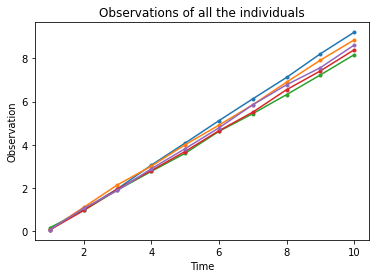

[0.006680264796921634, 0.9744857182288172]


In [6]:
#fixed parameters
sigma_v0 = 0.01
sigma_t0 = 0.01

t0_bar_bar = 0
v0_bar_bar = 1
st0 = 0.01
sv0 = 0.01

vxi = 6
mxi = 0.01
vtau = 6
mtau = 0.01
v = 6
m = 0.01

N = 5 #size of the population
K = 10 #number of observations for each individual

theta = [None for i in range(5)]
theta[0] = np.random.normal(t0_bar_bar, st0) #t0_bar
theta[1] = np.random.normal(v0_bar_bar, sv0) #v0_bar
theta[2] = np.sqrt(sp.invwishart(vxi, mxi).rvs(1)) #sigma_xi
theta[3] = np.sqrt(sp.invwishart(vtau, mtau).rvs(1)) #sigma_tau
theta[4] = np.sqrt(sp.invwishart(v, m).rvs(1)) #sigma


zpop = [None for i in range(2)]
zpop[0] = np.random.normal(theta[0], sigma_t0) #t0
zpop[1] = np.random.normal(theta[1], sigma_v0) #v0

z = np.zeros(2*N)
for i in range(N):
  z[2*i] = np.random.normal(0, theta[2]) #xi_i
  z[2*i+1] = np.random.normal(0, theta[3]) #tau_i

y = np.zeros((N, K))
for i in range(N):
    y[i] = zpop[1] * np.exp(z[2*i]) * (np.arange(K) - zpop[0] - z[2*i+1]) + np.random.normal(0, theta[4], K)

for i in range(N):
  plt.plot([j+1 for j in range(K)], y[i,:],'.-')
plt.xlabel('Time')
plt.ylabel('Observation')
plt.title('Observations of all the individuals')
plt.show()
print(zpop)

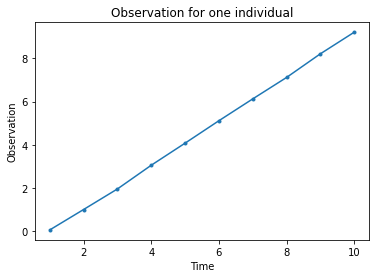

In [7]:
plt.plot([j+1 for j in range(K)], y[0,:],'.-')
plt.xlabel('Time')
plt.ylabel('Observation')
plt.title('Observation for one individual')
plt.show()

#Question 3

En écrivant $q(\cdot|y, \theta) = \frac{q(y, \cdot, \theta)}{q(y, \theta)} = \propto q(y|\cdot, \theta) q(\cdot|\theta)$ on voit que la target density est proportionnelle à la likelihood conditionnelle avec des facteurs de proportionnalités qui ne dépendent pas de $z$, i.e. qui se simplifient dans le ratio d'acceptance.

In [8]:
def f(y, z, theta):
  #computes conditional log-likelihood up to an additive constant
  ans = 0
  zpop = z[:2]
  zi = z[2:]
  for i in range(N):
    ans += -0.5*(((y[i]-zpop[1]*np.exp(zi[2*i])*(np.arange(K) - zpop[0] - zi[2*i+1]))/theta[4])**2).sum()
    ans += -0.5*(zi[2*i]/theta[2])**2
    ans += -0.5*(zi[2*i+1]/theta[3])**2
  ans += -0.5*((zpop[0]-theta[0])/sigma_t0)**2 - 0.5*((zpop[1]-theta[1])/sigma_v0)**2
  return ans


def mh_sampler(y, z0, theta, sigma_prop, max_iter = 100, return_list = False):
  zk = z0
  zk_list = np.zeros((max_iter, 2*N+2))
  for k in range(max_iter):
    #Proposal
    z_star = np.random.normal(zk, sigma_prop, size = 2*N+2)

    #Acceptance-Rejection
    rate = min(1, np.exp(f(y, z_star, theta) - f(y, zk, theta)))
    c = np.random.random()
    if c <= rate:
      zk = z_star
    zk_list[k] = zk
  if return_list:
    return zk_list 
  else:
    return zk

#Question 4

On dérive par rapport aux $5$ paramètres contenus dans $\theta$:
$$\bar{t_0} ↔ 0 = -(\bar{t}_0 - \bar{\bar{t}}_0)/s_{t_0}^2 - \bar{t}_0/\sigma_{t_0}^2 + S_k^1 \cdot \frac{1}{\sigma_{t_0}^2}$$
D'où $\bar{t_0} = \frac{\bar{\bar{t}}_0 \sigma_{t_0}^2 + S_k^1s_{t_0}^2}{\sigma_{t_0}^2 + s_{t_0}^2}$. De même, $\bar{v_0} = \frac{\bar{\bar{v}}_0 \sigma_{v_0}^2 + S_k^2s_{v_0}^2}{\sigma_{v_0}^2 + s_{v_0}^2}$.
$$\sigma ↔ 0 = -(m+2)/\sigma - KN/\sigma + v^2/\sigma^3 + S_k^5\cdot KN/\sigma^3$$
D'où $\sigma^2 = \frac{1}{m+2+KN}(v^2+S_k^5\cdot KN)$. De même,$\sigma_\xi^2 = \frac{1}{m_\xi+2+N}(v_\xi^2+S_k^3\cdot N)$ et $\sigma_\tau^2 = \frac{1}{m_\tau+2+N}(v_\tau^2+S_k^4\cdot N)$.

In [24]:
def epsilon(k, Nb=100, alpha=0.6):
  if k<=Nb:
    return 1
  else:
    return 1/(k-Nb)**alpha

def S(y, z):
  zpop = z[:2]
  zi = z[2:]

  S1 = zpop[0]
  S2 = zpop[1]
  S3 = np.mean([zi[2*i]**2 for i in range(N)])
  S4 = np.mean([zi[2*i+1]**2 for i in range(N)])
  S5 = 0
  for i in range(N):
    S5 += (1/N)*((y[i]-zpop[1]*np.exp(zi[2*i])*(np.arange(K) - zpop[0] - zi[2*i+1]))**2).mean()
  return np.array([S1, S2, S3, S4, S5])

def maximisation(Sk):
  theta0 = (t0_bar_bar*sigma_t0**2 + Sk[0]*st0**2)/(st0**2 + sigma_t0**2)
  theta1 = (v0_bar_bar*sigma_v0**2 + Sk[1]*sv0**2)/(sv0**2 + sigma_v0**2)
  theta2 = np.sqrt(1/(mxi+2+N)*(vxi**2 + Sk[2]*N))
  theta3 = np.sqrt(1/(mtau+2+N)*(vtau**2 + Sk[3]*N))
  theta4 = np.sqrt(1/(m+2+K*N)*(v**2 + Sk[4]*K*N))
  return np.array([theta0, theta1, theta2, theta3, theta4])


def mcmc_saem(y, theta0, max_iter1=500, max_iter2=5000, Nb = 0, alpha=0.6, return_list=False):
  Nb = max_iter1 // 2
  #Initialisation
  zk = np.zeros(2*N+2)
  Sk = np.zeros(5)
  thetak = theta0

  thetak_list = np.zeros((max_iter1, 5))
  for k in tqdm(range(1, max_iter1+1)):
    #Simulation
    zk = mh_sampler(y, zk, thetak, 0.01, max_iter2)

    #Stochastic Approximation
    Sk = Sk + epsilon(k, Nb, alpha)*(S(y, zk) - Sk)

    #Maximisation
    thetak = maximisation(Sk)

    #l1.append(thetak[0])
    #l2.append(thetak[1])
    thetak_list[k-1] = thetak
  
  if return_list:
    return thetak_list
  else:
    return thetak


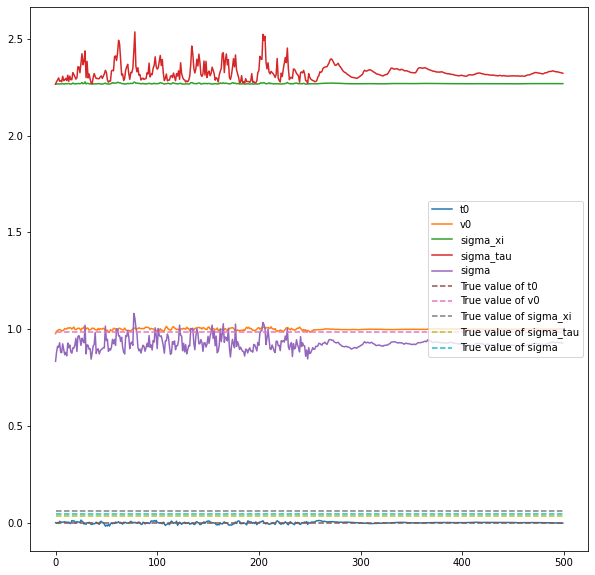

In [23]:
theta0 = theta
theta_list = mcmc_saem(y, theta0, return_list=True)

plt.figure(figsize=(10, 10))
plt.plot(theta_list[:, 0], label='t0')
plt.plot(theta_list[:, 1], label='v0')
plt.plot(theta_list[:, 2], label='sigma_xi')
plt.plot(theta_list[:, 3], label='sigma_tau')
plt.plot(theta_list[:, 4], label='sigma')

x = [0, theta_list.shape[0]-1]

w = [theta[0], theta[0]]
plt.plot(x, w, '--', label='True value of t0')
w = [theta[1], theta[1]]
plt.plot(x, w, '--', label='True value of v0')
w = [theta[2], theta[2]]
plt.plot(x, w, '--', label='True value of sigma_xi')
w = [theta[3], theta[3]]
plt.plot(x, w, '--', label='True value of sigma_tau')
w = [theta[4], theta[4]]
plt.plot(x, w, '--', label='True value of sigma')

plt.legend(loc='center right')
plt.show()

On voit ici que l'algorithme réussit à approcher les vraies valeurs de $t_0$ et $v_0$ cependant il est assez éloigné des vraies valeurs des variances.

#Question 5

On prend l'algorithme de Gibbs en remplaçant chaque étape d'échantillonnage de la loi conditionnelle par un échantillonnage de Hasting-Metropolis. Pour faire un échantillonnage de Hasting-Metropolis d'une certaine loi cible il faut savoir calculer le ratio des densités. Ici les lois  cibles sont $q(\xi_i|z_{pop},\tau_i, y, \theta)$ et $q(\tau_i|z_{pop},\xi_i, y, \theta)$. On peut réécrire la première : $$q(\xi_i|z_{pop}\tau_i, y, \theta) \propto q(y|z_i, z_{pop}, \theta)q(\xi_i|\theta)$$ avec un facteur de proportionnalité qui ne dépend plus que de $y, \theta, \tau_i, z_{pop}$. Ainsi le ratio est facilement calculable car ces deux termes le sont(deux densités Gaussiennes). Il est en de même pour la deuxième loi cible: $$q(\tau_i|z_{pop}\tau_i, y, \theta) \propto q(y|z_i, z_{pop}, \theta)q(\tau_i|\theta)$$

In [25]:
def mhwg_sampler_zi(i, zi, zpop, y, theta, sigma_prop=1, max_iter=50):

  xiik, tauik  = zi[2*i], zi[2*i+1]
  #1 - MH sampling for xiik
  def f1(xi, tau):
    #computes the target log-density up to some additive constant
    ans = 0
    ans += -0.5*(((y[i] - np.exp(xi)*zpop[1]*(np.arange(K) - tau - zpop[0]))/theta[4])**2).sum()
    ans += -0.5*(xi/theta[2])**2
    return ans
  zk = xiik
  for k in range(max_iter):
    #Proposal
    z_star = np.random.normal(0, sigma_prop)
  
    #Acceptance-Rejection
    rate = min(1, np.exp(f1(z_star, tauik) - f1(zk, tauik)))
    c = np.random.random()
    if c <= rate:
      zk = z_star
  xiik = zk


  #2 - MH sampling for tauik
  def f2(tau, xi):
    #computes the target log-density up to some additive constant
    ans = 0
    ans += -0.5*(((y[i] - np.exp(xi)*zpop[1]*(np.arange(K) - tau - zpop[0]))/theta[4])**2).sum()
    ans += -0.5*(tau/theta[3])**2
    return ans
  
  zk = tauik
  for k in range(max_iter):
    #Proposal
    z_star = np.random.normal(0, sigma_prop)
  
    #Acceptance-Rejection
    rate = min(1, np.exp(f2(z_star, xiik) - f2(zk, xiik)))
    c = np.random.random()
    if c <= rate:
      zk = z_star
  tauik = zk
    
  return xiik, tauik

#Question 6

Comme dans la question précédente, les ratios d'acceptance des deux lois cibles ($t_0, v_0$) se simplifient et sont calculables.

In [26]:
def mhwg_sampler_zpop(zpop, zi, y, theta, sigma_prop=0.01, max_iter=50):
  t0k, v0k  = zpop[0], zpop[1]

  #1 - MH sampling for t0k
  def f1(t0, v0):
    #computes the target log-density up to some additive constant
    ans = 0
    for i in range(N):
      ans += -0.5*(((y[i]-v0*np.exp(zi[2*i])*(np.arange(K) - t0 - zi[2*i+1]))/theta[4])**2).sum()
    ans += -0.5*(t0-theta[0]/sigma_t0)**2
    return ans
  
  zk = t0k
  for k in range(max_iter):
    #Proposal
    z_star = np.random.normal(0, sigma_prop)
  
    #Acceptance-Rejection
    rate = min(1, np.exp(f1(z_star, v0k) - f1(zk, v0k)))
    c = np.random.random()
    if c <= rate:
      zk = z_star
  t0k = zk


  #2 - MH sampling for v0k
  def f2(v0, t0):
    #computes the target log-density up to some additive constant
    ans = 0
    for i in range(N):
      ans += -0.5*(((y[i]-v0*np.exp(zi[2*i])*(np.arange(K) - t0 - zi[2*i+1]))/theta[4])**2).sum()
    ans += -0.5*(v0-theta[1]/sigma_v0)**2
    return ans
  
  zk = v0k
  for k in range(max_iter):
    #Proposal
    z_star = np.random.normal(0, sigma_prop)
  
    #Acceptance-Rejection
    rate = min(1, np.exp(f2(z_star, t0k) - f2(zk, t0k)))
    c = np.random.random()
    if c <= rate:
      zk = z_star
  v0k = zk
    
  return t0k, v0k

#Question 7

On reprend l'algorithme de la question $4$ en changeant le code de la partie 'simulation' (qui était faite par un MH sampling) par un HMwG sampling. Plus précisément, on échantillonne d'abord les paramètres $z_i$ grâce au code de la question $5$ puis les paramètres $z_{pop}$ grâce au code de la question $6$.

In [32]:
def mhwg_saem(y, theta0, max_iter1=200, max_iter2=5000, Nb = 0, alpha=0.6, return_list=False):
  Nb = max_iter1 // 2
  #Initialisation
  zk = np.zeros(2*N+2)
  Sk = np.zeros(5)
  thetak = theta0

  thetak_list = np.zeros((max_iter1, 5))
  for k in tqdm(range(1, max_iter1+1)):
    #Simulation

    #First simulating the random effects
    for i in range(N):
      xiik, tauik = mhwg_sampler_zi(i, zk[2:], zk[:2], y, theta, max_iter=max_iter2)
      zk[2+2*i] = xiik
      zk[2+2*i+1] = tauik
    #Then simulating the fixed effects
    t0k, v0k = mhwg_sampler_zpop(zk[:2], zk[2:], y, theta, max_iter=max_iter2)
    zk[0] = t0k
    zk[1] = v0k

    #Stochastic Approximation
    Sk = Sk + epsilon(k, Nb, alpha)*(S(y, zk) - Sk)

    #Maximisation
    thetak = maximisation(Sk)

    thetak_list[k-1] = thetak
  
  if return_list:
    return thetak_list
  else:
    return thetak

  0%|          | 0/200 [00:00<?, ?it/s]<ipython-input-26-2defcb4566b7>:41: RuntimeWarning: overflow encountered in exp
  rate = min(1, np.exp(f2(z_star, t0k) - f2(zk, t0k)))
  0%|          | 1/200 [00:03<11:54,  3.59s/it]<ipython-input-25-0615251a8d07>:17: RuntimeWarning: overflow encountered in exp
  rate = min(1, np.exp(f1(z_star, tauik) - f1(zk, tauik)))
100%|██████████| 200/200 [12:41<00:00,  3.81s/it]


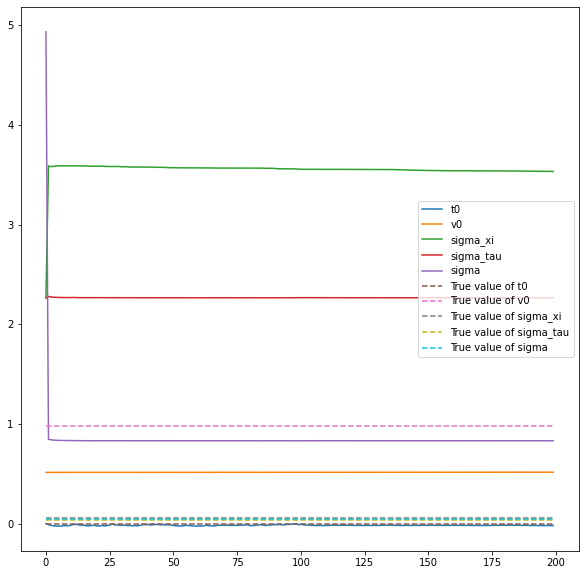

In [33]:
theta0 = theta
theta_list = mhwg_saem(y, theta0, return_list=True)

plt.figure(figsize=(10, 10))
plt.plot(theta_list[:, 0], label='t0')
plt.plot(theta_list[:, 1], label='v0')
plt.plot(theta_list[:, 2], label='sigma_xi')
plt.plot(theta_list[:, 3], label='sigma_tau')
plt.plot(theta_list[:, 4], label='sigma')

x = [0, theta_list.shape[0]-1]

w = [theta[0], theta[0]]
plt.plot(x, w, '--', label='True value of t0')
w = [theta[1], theta[1]]
plt.plot(x, w, '--', label='True value of v0')
w = [theta[2], theta[2]]
plt.plot(x, w, '--', label='True value of sigma_xi')
w = [theta[3], theta[3]]
plt.plot(x, w, '--', label='True value of sigma_tau')
w = [theta[4], theta[4]]
plt.plot(x, w, '--', label='True value of sigma')

plt.legend(loc='center right')
plt.show()

De nouveau les résultats ne sont pas satisfaisants. Les résultats sont moins bons que dans le MH-SAEM alors qu'ils devraient être meilleurs car on a amelioré le sampling sur la posterior grâce au sampling de Gibbs. On doit pouvoir obtenir des resultats corrects en trouvant une bonne variance $\sigma_{prop}$ ou en faisant un Hasting-Metropolis qui n'est plus forcément symétrique (on pourrait prendre en compte le fait que certains paramètres convergent plus vite que d'autres et ont tendance a empêcher les autres de changer). Par manque de temps on n'a pas réussi a faire fonctionner l'algorithme.

#Question 8

Un avantage du Block Gibbs Sampler est que la complexité est diminuée par rapport au 'one-at-a-time'.

#Question 9

La différence dans cette question est qu'au lieu d'échantillonner variable par variable, on échantillonne par bloc de variable. On peut juste réutiliser le code des questions $5$ et $6$ en considérant l'échantillonnage de Gibbs de la variable $(\xi_i,\tau_i)$ comme un seul bloc et non pas comme deux variables (de même pour $z_{pop}$). Les lois a posteriori peuvent s'écrire:
$$q(z_i | z_{pop}, y, \theta) \propto q(y| z_i, z_{pop},\theta)q(\xi_i|\theta)q(\tau_i|\theta)$$
$$q(z_{pop}|z_i, y, \theta) \propto q(y| z_i, z_{pop},\theta)q(t_0|\theta)q(v_0|\theta)$$

In [ ]:
def block_mhwg_sampler_zi(i, zi, zpop, y, theta, sigma_prop=1, max_iter=50):
  def f(z):
    xi, tau = z[0], z[1]
    #computes the target log-density up to some additive constant
    ans = 0
    ans += -0.5*(((y[i] - np.exp(xi)*zpop[1]*(np.arange(K) - tau - zpop[0]))/theta[4])**2).sum()
    ans += -0.5*(xi/theta[2])**2
    ans += -0.5*(tau/theta[3])**2
    return ans
  
  zk = zi[2*i:2*i+2]
  for k in range(max_iter):
    #Proposal
    z_star = np.random.normal(0, sigma_prop, 2)
  
    #Acceptance-Rejection
    rate = min(1, np.exp(f(z_star) - f(zk)))
    c = np.random.random()
    if c <= rate:
      zk = z_star
  
  return zk[0], zk[1]

In [ ]:
def block_mhwg_sampler_zpop(zpop, zi, y, theta, sigma_prop=1, max_iter=50):
  def f(z):
    #computes the target log-density up to some additive constant
    t0, v0 = z[0], z[1]
    ans = 0
    for i in range(N):
      ans += -0.5*(((y[i]-v0*np.exp(zi[2*i])*(np.arange(K) - t0 - zi[2*i+1]))/theta[4])**2).sum()
    ans += -0.5*(t0-theta[0]/sigma_t0)**2
    ans += -0.5*(v0-theta[1]/sigma_v0)**2
    return ans
  
  zk = zpop[0], zpop[1]
  for k in range(max_iter):
    #Proposal
    z_star = np.random.normal(0, sigma_prop, 2)
  
    #Acceptance-Rejection
    rate = min(1, np.exp(f(z_star) - f(zk)))
    c = np.random.random()
    if c <= rate:
      zk = z_star
    
  return zk[0], zk[1]

In [ ]:
def block_mhwg_sampler(y, theta, max_iter1=1000, max_iter2=100):
  zk = np.random.normal(0, 1, 2*N+2)
  for k in range(max_iter1):
    #First sampling the random effects
    for i in range(N):
      xiik, tauik = block_mhwg_sampler_zi(i, zk[2:], zk[:2], y, theta, max_iter=max_iter2)
      zk[2+2*i] = xiik
      zk[2+2*i+1] = tauik
    #Then sampling the fixed effects
    t0k, v0k = block_mhwg_sampler_zpop(zk[:2], zk[2:], y, theta, max_iter=max_iter2)
    zk[0] = t0k
    zk[1] = v0k
  return zk

#Exercice 2

#Question 1

Soit $X$ l'état courant de la chaine de Markov. On veut obtenir la densité de probabilité de proposition $q(X, Y)$ lorsqu'on se situe en $X$. Soit $h$ mesurable bornée, on a (formule de l'espérance totale):
$$\mathbb{E}[h(Y)] = \mathbb{E}_{B, \epsilon}[\mathbb{E}[h(Y)|B, \epsilon]]$$ 
En supposant $B, \epsilon$ indépendants:
$$\mathbb{E}[h(Y)] = \frac{1}{2}\int_{-1}^1 h(\epsilon X)f(\epsilon)d \epsilon + \frac{1}{2}\int_{-1}^1 h(X/\epsilon) f(\epsilon)d \epsilon$$
On pose le changement de variables $y = \epsilon X$ dans la première intégrale (valable seulement si $X$ est non nul):
$$\int_{-1}^1 h(\epsilon X)f(\epsilon)d \epsilon = \frac{1}{|X|}\int_{-|X|}^{|X|} h(y)f(y/X)dy$$
On pose le changement de variable $y = X/\epsilon$ dans la deuxième intégrale (si $X$ non nul). On a $dy = -Xd\epsilon / \epsilon^2$. Ce changement de variable est un difféomorphisme d'ouverts (l'ouvert de départ est $]-1, 0[⋃]0, 1[$:
$$\int_{-1}^1 h(X/\epsilon) f(\epsilon)d \epsilon = |X| \int_{y>|X|} h(y) f(X/y)/y^2dy$$
En sommant ces deux intégrales, on peut identifier la densité voulue pour $X$ non nul:
$$q(X, y) = \frac{1}{2}(\frac{f(y/X)}{|X|}1_{|y|<|X|}(y) + |X|\frac{f(X/y)}{y^2}1_{|y|>|X|}(y))$$
(Il n'y a pas de problème lorsque $y$ vaut $0$ car la densité peut être définie a un ensemble de mesure nulle près).
Si $X$ est nul, on a:
$$q(0, y) = \delta_0(y)$$.

#Question 2

On doit donc calculer le ratio $\frac{q(Y, X)}{q(X, Y)}$. Calculons le pour $X$ non nul:
$$\frac{q(Y, X)}{q(X, Y)} = \frac{\frac{f(X/Y)}{|Y|}1_{|X|<|Y|}(X) + |Y|f(Y/X)/X^21_{|X|>|Y|}(X)}{\frac{f(Y/X)}{|X|}1_{|Y|<|X|}(Y) + |X|f(X/Y)/Y^21_{|Y|>|X|}(Y)}$$
En évaluant l'expression sur les ensembles $|Y|<|X|$ et $|Y|>|X|$ on obtient :
$$\frac{q(Y, X)}{q(X, Y)} = \frac{|Y|}{|X|}.$$
Le ratio d'acceptance s'écrit donc:
$$\alpha(X, Y) = \min(1, \frac{|Y|\pi(Y)}{|X|\pi(X)}).$$

#Question 3
On prend comme densités cibles une loi normale centrée réduite $\mathcal{N}(0, 1)$ et une loi du $χ^2$ avec un degré de liberté égal à $10$.

In [34]:
@np.vectorize
def target1(x):
  return sp.norm(0, 1).pdf(x)

@np.vectorize
def target2(x):
  return sp.chi2.pdf(x, 10)

In [35]:
def multiplicative_mh_sampling(target, x0=1, N = 1000):
  def alpha(x, y):
    return min(1, np.abs(y)*target(y)/(np.abs(x)*target(x)))
  
  samples = np.zeros(N)
  xn = x0

  for n in range(N):

    #Proposition:
    eps = 2*np.random.random()-1
    b = np.random.randint(0, 2)
    y = xn
    if b:
      y *= eps
    else:
      y /= eps
    
    #Acceptance-Rejection
    c = np.random.random()
    if c<=alpha(xn, y):
      xn = y
    samples[n] = xn
  return samples

Testons l'algorithme sur les deux densités.

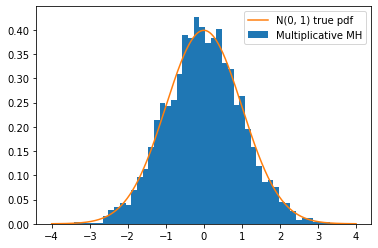

In [36]:
samples = multiplicative_mh_sampling(target1, 1, 10000)
plt.hist(samples, bins=50, density=True, label='Multiplicative MH')
x = np.linspace(-4, 4, 1000)
f = target1(x)
plt.plot(x,f, label='N(0, 1) true pdf')
plt.legend()
plt.show()

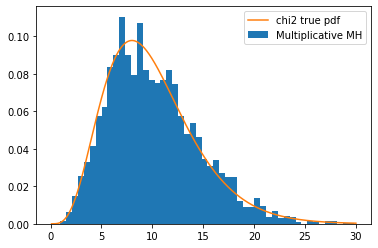

In [37]:
samples = multiplicative_mh_sampling(target2, 1, 10000)
plt.hist(samples, bins=50, density=True, label='Multiplicative MH')
x = np.linspace(0.1, 30, 1000)
f = target2(x)
plt.plot(x,f, label='chi2 true pdf')
plt.legend()
plt.show()

On voit sur les deux exemples de loi cible que le multiplicative Hasting-Metropolis réussit bien à échantillonner selon la loi cible. En effet les histogrammes des échantillons obtenus approximent particulièrement bien les lois.

#Exercice 3


#Question 1

Pour montrer qu'un processus est une chaine de Markov on doit montrer que pour toute fonction $h$ mesurable bornée $\mathbb{E}(h(X_n, Y_n)| \mathcal{F}_n) = \mathbb{E}(h(X_n, Y_n)| X_{n-1}, Y_{n-1})$. Ici on sait par construction que $X_n, Y_n$ ne dépendent que $X_{n-1}, Y_{n-1}$(en realité seulement de $Y_{n-1})$ donc l'égalité précédente est verifiée. De plus on connait la densité $q$ du couple $X_n, Y_n$ conditionnellement a $Y_{n-1}$:
$$q(x_n, y_n|y_{n-1}) = f_{Y|X}(x_n, y_n)f_{X|Y}(x_n, y_{n-1})$$
Plus précisément, pour toute fonction $h$ mesurable bornée $$\mathbb{E}(h(X_n, Y_n)|X_{n-1}, Y_{n-1}) = \int \int h(x_n, y_n)f_{Y|X}(x_n, y_n)f_{X|Y}(x_n, Y_{n-1})dx_ndy_n.$$
On voit d'après cette égalité que la chaine est homogène. On peut de plus calculer le noyau de transition pour tout $x,y$ et $A \in \mathcal{B}(\mathbb{R}^{p+q})$:
$$P((x,y), A) = \int_A f_{Y|X}(x', y')f_{X|Y}(x', y)dx'dy'.$$ 

#Question 2

De même comme $Y_{n}$ ne dépend que de $X_{n}$ qui ne dépend que de $Y_{n-1}$, le processus $(Y_n)_n$ est bien une chaine de Markov. De plus on peut calculer son noyau de transition en conditionnant par $X_n$. Pour toute fonction $h$ mesurable bornée:
$$\mathbb{E}[h(Y_n)|Y_{n-1}] = \mathbb{E}_{X_n}[\mathbb{E}[h(Y_n)|Y_{n-1}, X_n]]$$
$$\mathbb{E}[h(Y_n)|Y_{n-1}] = \int \int h(y_n)f_{Y|X}(x_n, y_n)f_{X|Y}(x_n, Y_{n-1})dy_ndx_n.$$
On en déduit l'expression du noyau de transition pour tout $y$ et $A \in \mathcal{B}(\mathbb{R}^{q})$:
$$P(y, A) = \int_{\mathbb{R} \times A} f_{Y|X}(x', y')f_{X|Y}(x', y)dx'dy'.$$

De plus la mesure $dP(y) = f_Y(y)dy$ est invariante pour ce noyau. En effet soit $A \subset  \mathcal{B}(\mathbb{R}^q)$ :
$$\pi P(A) = \int_{\mathbb{R}} \pi(y)P(y, A)dy = \int_{\mathbb{R}} \pi(y) \int_{\mathbb{R} \times A} f_{Y|X}(x', y')f_{X|Y}(x', y)dx'dy'dy$$
$$\pi P(A) = \int_{\mathbb{R}} f_Y(y)\int_{\mathbb{R} \times A} f_{Y|X}(x', y')f_{X|Y}(x', y)dx'dy'dy$$
$$\pi P(A) = \int_{\mathbb{R}} \int_{\mathbb{R} \times A} f_{Y|X}(x', y')f_{X|Y}(x', y)f_Y(y)dx'dy'dy$$
On change l'ordre d'intégration:
$$\pi P(A) = \int_{\mathbb{R}\times A} f_{Y|X}(x', y')(\int_{\mathbb{R}} f_{X|Y}(x', y)f_Y(y)dy)dx'dy'$$
On reconnait la quantité à l'intérieur de la parenthèse:
$$\pi P(A) = \int_{\mathbb{R}\times A} f_{Y|X}(x', y')f_X(x')dx'dy'$$
Ce qui se simplifie de nouveau:
$$\pi P(A) = \int_{A} f_Y(y')dy' = \pi(A)$$

#Question 3

L'algorithme de 'Data Augmentation' proposé n'est ni plus ni moins qu'un algorithme de Gibbs. Si on l'applique à la densité $f$ ci-dessus alors on arrivera à échantillonner selon cette loi. Pour pouvoir utiliser l'algorithme il faut être en mesure d'échantillonner selon les lois conditionnelles. Pour cela, calculons d'abord les lois marginales:
$$f_X(x) = \int_{\mathbb{R}^+} f(x, y)dy$$
$$f_X(x) = \frac{4}{\sqrt{2\pi}}\int_{\mathbb{R}^+}y^{1.5}e^{-y(x^2/2+2)}dy$$
On pose $u^2 = y$. On a $dy = 2udu$.
$$f_X(x) = \frac{8}{\sqrt{2\pi}}\int_{\mathbb{R}^+}y^{4}e^{-y^2(x^2/2+2)}dy$$
On fait une première intégration par parties (le crochet vaut 0):
$$f_X(x) = \frac{24}{\sqrt{2\pi}(x^2+4)}\int_{\mathbb{R}^+}y^{2}e^{-y^2(x^2/2+2)}dy$$
On fait une deuxième intégration par parties (le crochet vaut encore 0):
$$f_X(x) = \frac{24}{\sqrt{2\pi}(x^2+4)^2}\int_{\mathbb{R}^+}e^{-y^2(x^2/2+2)}dy$$
On reconnait l'integrale d'une densite Gaussienne sur $\mathbb{R}^+$:
$$f_X(x) = \frac{12}{(x^2+4)^{5/2}}$$
De plus, lorsque $y > 0$:
$$f_Y(y) = \int_{\mathbb{R}^+} f(x, y)dx$$
$$f_Y(y) = \frac{4}{\sqrt{2\pi}}y^{1.5}e^{-2y} \int e^{-yx^2/2}dx$$
On reconnait l'intégrale d'une densité Gaussienne:
$$f_Y(y) = 4ye^{-2y}dx.$$
On en déduit les densités conditionnelles:
$$f_{X|Y}(x, y) = \frac{1}{\sqrt{2\pi}}\sqrt{y} e^{-yx^2/2}1_{>0}(y)$$
$$f_{Y|X}(x, y) = \frac{1}{3\sqrt{2\pi}}y^{1.5} e^{-y(x^2/2+2)}(x^2+4)^{5/2}1_{>0}(y)$$
$$f_{Y|X}(x, y) = \frac{4}{3\sqrt{\pi}}y^{1.5} e^{-y(x^2/2+2)}(x^2/2+2)^{5/2}1_{>0}(y)$$

La première conditionnelle est une Gaussienne $\mathcal{N}(0, \sigma^2 = 1/y)$. On sait échantillonner selon cette loi. La deuxième est exactement une loi Gamma $\Gamma(\frac{5}{2}, \frac{1}{x^2/2+2})$. En effet on peut calculer $\Gamma(5/2)$ avec la propriete de base de la fonction Gamma: $\Gamma(5/2) = \frac{3}{2}\frac{1}{2} \Gamma(\frac{1}{2})$. Et il est connu que $\Gamma(\frac{1}{2}) = \sqrt{\pi}$. On sait egalement échantillonner selon cette loi. Donc on peut bien échantillonner selon ces deux lois et l'algorithme est implémentable.

In [38]:
def gibbs_algo(x0, y0, N=1000):
  xn, yn = x0, y0
  x, y = list(), list()
  for n in range(N):
    xn = np.random.normal(0, 1/np.sqrt(yn))
    yn = np.random.gamma(2.5, 1/(0.5*xn**2+2))

    x.append(xn)
    y.append(yn)
  return x, y

On peut vérifier trois propriétés sur l'algorithme : $1.$les échantillons $(X_n)$ suivent la loi marginale $f_X$ $2.$ les échantillons $(Y_n)$ suivent la loi marginale $f_Y$ $3.$ les échantillons $(X_n, Y_n)$ suivent la loi $f_{X, Y}$. En effet comme on le montre à la question suivante, les lois marginales $f_X$ et $f_Y$ sont les lois stationnaires des chaines de Markov $(X_n)$ et $(Y_n)$.

In [39]:
#marginale de X
@np.vectorize
def fx(x):
  return 12/(x**2+4)**(2.5)

In [40]:
#marginale de Y
@np.vectorize
def fy(y):
  return 4*y*np.exp(-2*y)

In [41]:
#loi jointe
@np.vectorize
def fxy(x, y):
  if y < 0:
    return 0
  else:
    return 4/(np.sqrt(2*np.pi))*y**1.5*np.exp(-y*(x**2/2+2))

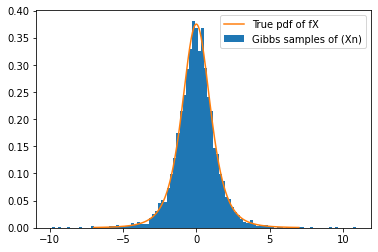

In [42]:
x, y = gibbs_algo(0, 1, 5000)
plt.hist(x, bins=100, density=True, label='Gibbs samples of (Xn)')
t = np.linspace(-7, 7, 1000)
plt.plot(t, fx(t), label='True pdf of fX')
plt.legend()
plt.show()

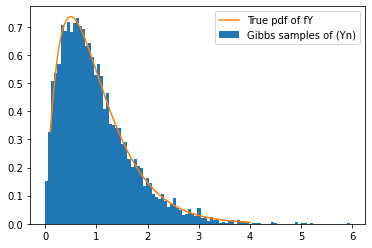

In [43]:
x, y = gibbs_algo(0, 1, 5000)
plt.hist(y, bins=100, density=True, label='Gibbs samples of (Yn)')
t = np.linspace(0.1, 4, 1000)
plt.plot(t, fy(t), label='True pdf of fY')
plt.legend()
plt.show()

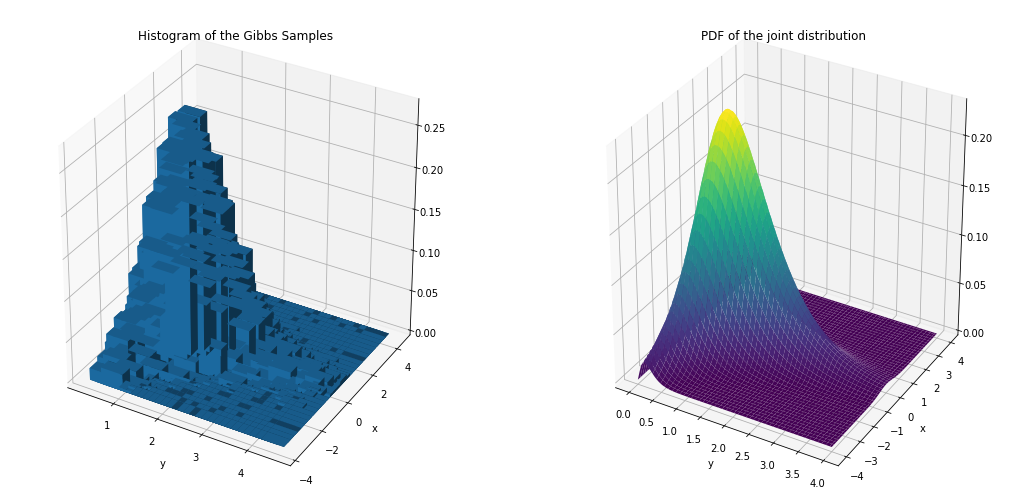

In [44]:
x, y = gibbs_algo(0, 1, 10000)

fig = plt.figure(figsize=(18, 9))
ax = fig.add_subplot(121, projection='3d')

#Plotting 2D Histogram of the Gibbs samples
hist, xedges, yedges = np.histogram2d(y, x, bins=30, range=[[0, 4], [-4, 4]], density=True)
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_title('Histogram of the Gibbs Samples')

#Plotting the joint pdf
X, Y = np.meshgrid(np.linspace(0, 4, 100),np.linspace(-4, 4, 100))
Z = fxy(Y, X)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis')

ax2.set_xlabel('y')
ax2.set_ylabel('x')
ax2.set_title('PDF of the joint distribution')

plt.show()

On voit d'apres les figures ci-dessus que les trois propriétés sont verifiées. En effet les échantillons approximent particulièrement bien les lois, ce qui confirme que l'algorithme marche.

#Question 4

L'expression que l'on souhaite évaluer est l'espérance de la variable aléatoire $H(X)$ (à la constante $12$ près) avec $X$ une variable aléatoire de densité $f_X$ avec $f_X$ la marginale que l'on a calculée plus haut. Une méthode facile pour approximer ce genre de quantité est la somme de Monte-Carlo. On veut donc avoir des échantillons de la loi $f_X$. On peut avoir ces échantillons en ne regardant que les sorties $(X_n)_n$ du Gibbs sampler précedent. En effet on a prouvé a la question 2, que la loi marginale $f_Y$ etait invariante pour la chaine de Markov $(Y_n)_n$. On aurait egalement pu montrer que $(X_n)_{n \geq 1}$ est une chaine de Markov(car $X_1$ ne dépend pas de $X_0$) et que la loi marginale $f_X$ est invariante pour cette chaine. Cela veut dire qu'asymptotiquement, les échantillons $(X_n)_n$ suivent la loi marginale $f_X$. Eventuellement on peut ne considérer que les échantillons $(X_n)_{n \geq n_0}$ pour un certain $n_0$ arbitraire.

On peut tester la methode avec $H(x) = (x^2+4)^{1.5}$. Cette fonction n'est pas bornée mais on sait que l'intégrale contre la densite $\frac{1}{(x^2+4)^{2.5}}$ existe et dans ce cas on sait la calculer : cela vaut $\pi/2$. 

In [45]:
@np.vectorize
def H(x):
  return (x**2+4)**1.5

def mc_estimate(N=1000, n0=50):
  x, _ = gibbs_algo(0, 1, N)
  return (1/12)*np.mean(H(x[n0:]))

In [46]:
N, n0, n_estimates = 10000, 50, 100

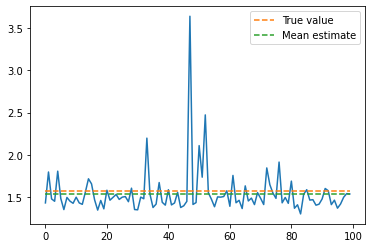

In [48]:
estimates = [mc_estimate(N, n0) for i in range(n_estimates)]

x = [0, n_estimates-1]
y = [np.pi/2, np.pi/2]

xm = [0, n_estimates-1]
ym = [np.mean(estimates), np.mean(estimates)]

plt.plot(estimates)
plt.plot()
plt.plot(x, y, '--', label='True value')
plt.plot(xm, ym, '--', label='Mean estimate')
plt.legend()
plt.show()

On voit sur le plot précédent que la méthode marche assez bien sur cette fonction. La valeur moyenne est assez proche de la vraie valeur de l'intégrale. Cependant en exécutant plusieurs fois le code on s'apercoit que l'erreur faite par cette méthode a toujours le même signe (elle est toujours un peu en-dessous).